<a href="https://colab.research.google.com/github/ShakedZrihen/worldwide-song-hit-formula/blob/predictions/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict if song can be a hit

## Imports and mount dataset

In [88]:
## General
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## ML Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## Load data set

In [7]:
charts_data_df = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/chartsData.csv')

In [8]:
charts_data_df.head(10)

,Unnamed: 0,Artist,Position,Streams,Track Name,URL,country,dates
0,0,Red Velvet,1,205528,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Viet Nam,2019-12-27--2020-01-03
1,1,Red Velvet,106,314994,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Indonesia,2020-11-13--2020-11-20
2,2,Red Velvet,107,79162,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Thailand,2020-11-20--2020-11-27
3,3,Red Velvet,82,64279,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Singapore,2020-07-31--2020-08-07
4,4,Red Velvet,91,367569,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Indonesia,2020-10-09--2020-10-16
5,5,Red Velvet,138,22725,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Hong Kong,2020-07-10--2020-07-17
6,6,Red Velvet,131,102957,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Japan,2019-12-27--2020-01-03
7,7,Red Velvet,125,6432,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,United Arab Emirates,2020-01-03--2020-01-10
8,8,Red Velvet,28,141716,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Malaysia,2020-03-20--2020-03-27
9,9,Red Velvet,5,98150,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Viet Nam,2020-01-31--2020-02-07


## Get all top 10 songs

In [9]:
top_10_songs_df = charts_data_df[charts_data_df.Position <= 10]
print(f'Top 10 songs (with duplications): {len(top_10_songs_df)}')

# Top 10 songs (without duplications)
top_10_songs_uniqu_df = top_10_songs_df['URL'].unique()
print(f'Top 10 songs (without duplications): {len(top_10_songs_uniqu_df)}')

Top 10 songs (with duplications): 107460
Top 10 songs (without duplications): 6749


In [10]:
# Get most popular songs in top 10 charts
top_10_songs_dup_df = top_10_songs_df.pivot_table(columns=['Track Name', 'Artist'], aggfunc='size').sort_values(ascending=False)
top_10_songs_dup_df.head(10)

Track Name                                      Artist       
Blinding Lights                                 The Weeknd       1558
Dance Monkey                                    Tones And I      1409
Señorita                                        Shawn Mendes     1007
bad guy                                         Billie Eilish     833
Roses - Imanbek Remix                           SAINt JHN         767
Don't Start Now                                 Dua Lipa          635
Without Me                                      Halsey            620
Mood (feat. iann dior)                          24kGoldn          608
ROCKSTAR (feat. Roddy Ricch)                    DaBaby            602
Taki Taki (with Selena Gomez, Ozuna & Cardi B)  DJ Snake          599
dtype: int64

In [11]:
# Get most popular artist
top_10_songs_dup_df = top_10_songs_df.pivot_table(columns=['Artist'], aggfunc='size').sort_values(ascending=False)
top_10_songs_dup_df.head(10)

Artist
Bad Bunny        3604
Post Malone      2591
Ariana Grande    2589
The Weeknd       2217
Billie Eilish    1941
Drake            1767
J Balvin         1484
Anuel AA         1432
Tones And I      1412
Sech             1327
dtype: int64

## Prepare our dataset for build our models

### Descibe our models

In [91]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


### Final data tunning

In [96]:
# Add target column
set_unique = set(top_10_songs_uniqu_df)
charts_data_df['target'] = charts_data_df.apply(lambda row: 1 if row.URL in set_unique else 0, axis=1)


In [97]:
charts_data_df['id'] = charts_data_df.apply(lambda row: row.URL.rsplit('/', 1)[-1], axis=1) 
charts_data_df.sample(10)

,Unnamed: 0,Artist,Position,Streams,Track Name,URL,country,dates,target,id
1670375,1670375,Abraham Mateo,183,162968,Me Vuelvo Loco,https://open.spotify.com/track/0KmeVVL1SHlPIiH...,Argentina,2019-08-16--2019-08-23,0,0KmeVVL1SHlPIiHWtOD34X
1830643,1830643,Flow G,29,623514,Araw-Araw Love,https://open.spotify.com/track/1x7DysraeqSgVgj...,Philippines,2020-07-03--2020-07-10,0,1x7DysraeqSgVgj95hHc3U
1334891,1334891,Angèle,133,45614,Jalousie,https://open.spotify.com/track/3U5x1rplpJNKR3X...,Belgium,2019-05-24--2019-05-31,0,3U5x1rplpJNKR3Xg88EfLi
798111,798111,Ozuna,55,51983,Caramelo - Remix,https://open.spotify.com/track/67jvGGbJmOmVonl...,Costa Rica,2020-12-11--2020-12-18,0,67jvGGbJmOmVonlyX3mNkV
1731106,1731106,DJ Snake,163,5416,Let Me Love You,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Honduras,2018-04-06--2018-04-13,0,4pdPtRcBmOSQDlJ3Fk945m
785938,785938,Rauw Alejandro,5,159366,Tattoo - Remix with Camilo,https://open.spotify.com/track/4ZRrLHqzhGRXYj2...,Costa Rica,2020-09-11--2020-09-18,1,4ZRrLHqzhGRXYj2qcB4s5S
530332,530332,Dua Lipa,38,526445,IDGAF,https://open.spotify.com/track/76cy1WJvNGJTj78...,Australia,2018-05-11--2018-05-18,1,76cy1WJvNGJTj78UqeA5zr
1237303,1237303,Hussain Aljassmi,17,27174,Bel Bont El3areedh,https://open.spotify.com/track/4ZU4yHDLZcMcy8B...,Egypt,2020-12-25--2021-01-01,1,4ZU4yHDLZcMcy8BF6Y89fu
922742,922742,Sebastian Yatra,181,452823,Por Perro,https://open.spotify.com/track/2alIsNw1mqEShbW...,Mexico,2019-05-24--2019-05-31,1,2alIsNw1mqEShbWyO1HXZZ
1437746,1437746,Luis Alberto Spinetta,91,305571,Seguir Viviendo Sin Tu Amor,https://open.spotify.com/track/2qBirMakpTdz9ym...,Argentina,2021-03-26--2021-04-02,0,2qBirMakpTdz9ymxrZEyzg


In [98]:
## load songs data
songsData = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/uniquSongsData.csv')
del songsData['track_href']
del songsData['name']
songsData.sample(5)


,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,numeric_key,popularity,speechiness,tempo,time_signature,valence
45751,0.200,0.429,179583.0,0.535,67QF5asz4N1rZT0T7U16JA,0.000000,G#,0.1440,-5.397,1.0,8.0,37.0,0.0464,142.807,3.0,0.432
37915,0.040,0.737,182923.0,0.816,7cYcaVZQodQ4gSOV43EkmE,0.000001,F,0.2200,-6.232,1.0,5.0,40.0,0.1240,94.460,4.0,0.768
11591,0.063,0.855,193027.0,0.651,5Z8HZM6iQMhhqyPcCGY5g9,0.000000,C,0.0772,-8.044,0.0,0.0,73.0,0.2350,111.997,4.0,0.559
16949,0.517,0.760,240065.0,0.691,2Ch60RcV8uYCxFWUC7D1SE,0.000000,D,0.1610,-8.586,1.0,2.0,5.0,0.0615,100.004,4.0,0.967
55210,0.373,0.518,168387.0,0.579,65UwFio0i2UgiqQioRt1Dp,0.130000,C#,0.2290,-10.383,1.0,1.0,21.0,0.0602,139.964,4.0,0.132


In [99]:
## Get our full df
prepared_df = pd.merge(charts_data_df.drop_duplicates(subset=['id'], keep='last'), songsData, on=['id'])
del prepared_df['Unnamed: 0']
prepared_df.sample(5)

,Artist,Position,Streams,Track Name,URL,country,dates,target,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,numeric_key,popularity,speechiness,tempo,time_signature,valence
23196,Sael,183,191240,Rompe el Party (Remix),https://open.spotify.com/track/0bpzKlI1oiRYp9U...,Argentina,2019-10-11--2019-10-18,0,0bpzKlI1oiRYp9UnK90qcV,0.1350,0.769,207673.0,0.744,0.00000,A,0.0491,-4.453,0.0,9.0,46.0,0.2710,149.912,3.0,0.632
45473,Rema,149,4880,Dumebi,https://open.spotify.com/track/42s0RItv03UZZ1t...,Morocco,2019-08-30--2019-09-06,0,42s0RItv03UZZ1tYmQQuQT,0.1650,0.920,179383.0,0.642,0.00413,D#,0.1090,-5.780,0.0,3.0,0.0,0.0616,110.003,4.0,0.742
20669,DJ Cleo,174,19478,Gcina Impilo Yami,https://open.spotify.com/track/76yZgddXq3rF5C7...,South Africa,2021-04-23--2021-04-30,0,76yZgddXq3rF5C7wPuZ4OC,0.0224,0.780,323800.0,0.732,0.00688,F#,0.0391,-6.841,1.0,6.0,43.0,0.0596,112.982,4.0,0.880
38035,Alremmas,135,13290,Saif Nabeel Ya Rohiy,https://open.spotify.com/track/3RRStsQ6MoSLhY4...,Saudi Arabia,2020-07-31--2020-08-07,0,3RRStsQ6MoSLhY4excSXar,0.1560,0.699,206080.0,0.415,0.00000,F,0.0815,-10.701,0.0,5.0,0.0,0.0534,120.620,3.0,0.591
17408,D-Block Europe,179,396017,Keeper,https://open.spotify.com/track/5fLa9OF5eaUOWz8...,United Kingdom,2019-02-15--2019-02-22,0,5fLa9OF5eaUOWz81oDqhgg,0.2200,0.760,246713.0,0.535,0.00000,D#,0.0894,-9.634,0.0,3.0,52.0,0.2980,143.020,4.0,0.741


### Some features comparison

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

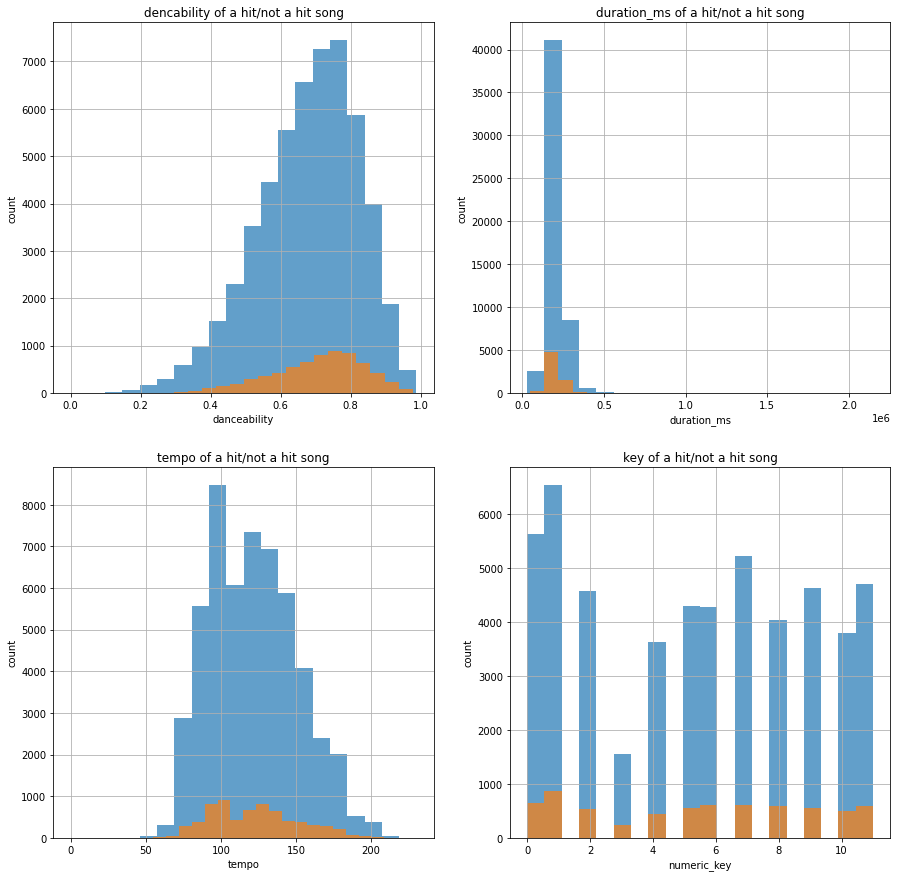

In [116]:
## danceability
hits_danceability_df = prepared_df[prepared_df['target'] == 1]['danceability']
no_hits_danceability_df = prepared_df[prepared_df['target'] == 0]['danceability']

fig = plt.figure(figsize=(15, 15))
danceability = fig.add_subplot(221)
danceability.set_xlabel('danceability')
danceability.set_ylabel('count')
danceability.set_title('dencability of a hit/not a hit song')
no_hits_danceability_df.hist(alpha=0.7, bins = 20)
fig.add_subplot(221)
hits_danceability_df.hist(alpha=0.7, bins = 20, label = 'hit')

## duration_ms

hits_duration_ms_df = prepared_df[prepared_df['target'] == 1]['duration_ms']
no_hits_duration_ms_df = prepared_df[prepared_df['target'] == 0]['duration_ms']

duration_ms = fig.add_subplot(222)
duration_ms.set_xlabel('duration_ms')
duration_ms.set_ylabel('count')
duration_ms.set_title('duration_ms of a hit/not a hit song')
no_hits_duration_ms_df.hist(alpha=0.7, bins = 20)
fig.add_subplot(222)
hits_duration_ms_df.hist(alpha=0.7, bins = 20)

## tempo
hits_tempo_df = prepared_df[prepared_df['target'] == 1]['tempo']
no_hits_tempo_df = prepared_df[prepared_df['target'] == 0]['tempo']

tempo = fig.add_subplot(223)
tempo.set_xlabel('tempo')
tempo.set_ylabel('count')
tempo.set_title('tempo of a hit/not a hit song')
no_hits_tempo_df.hist(alpha=0.7, bins = 20)
fig.add_subplot(223)
hits_tempo_df.hist(alpha=0.7, bins = 20)

## key
hits_numeric_key_df = prepared_df[prepared_df['target'] == 1]['numeric_key']
no_hits_numeric_key_df = prepared_df[prepared_df['target'] == 0]['numeric_key']

numeric_key = fig.add_subplot(224)
numeric_key.set_xlabel('numeric_key')
numeric_key.set_ylabel('count')
numeric_key.set_title('key of a hit/not a hit song')
no_hits_numeric_key_df.hist(alpha=0.7, bins = 20)
fig.add_subplot(224)
hits_numeric_key_df.hist(alpha=0.7, bins = 20)


### Preprocess

In [83]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['Track Name', 'Artist', 'URL', 'dates', 'id', 'country', 'key'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [84]:
X_train, X_test, y_train, y_test = preprocess_inputs(prepared_df)

### Train models

In [92]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.
                     Gradient Boosting trained.


### Get models scores

In [93]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


                   Logistic Regression: 90.16%
                   K-Nearest Neighbors: 88.92%
                         Decision Tree: 84.84%
   Support Vector Machine (RBF Kernel): 89.48%
                         Random Forest: 91.29%
                     Gradient Boosting: 91.31%
